In [17]:
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

#Dataset Generation

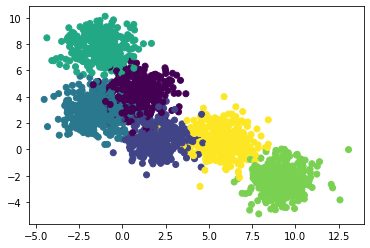

In [7]:
torch.manual_seed(0)
data, labels = make_blobs(n_samples=2000, centers=6, n_features=2, random_state=0)
plt.scatter(data[:,0], data[:,1], c=labels)
plt.show()

# Splitting data for training and testing

In [11]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
#print(X_train.shape, X_val.shape, Y_train.shape)
X_train, Y_train, X_val, Y_val = map(torch.tensor, (X_train, Y_train, X_val, Y_val))

# Feed Forward Network

In [14]:
class Feed_Forward(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2, 16), 
        nn.Sigmoid(), 
        nn.Linear(16,6),
        nn.Softmax(),
    )

  def forward(self, X):
    return self.net(X)

#Accuracy

In [27]:
def accuracy(y_hat, y):
  pred = torch.argmax(y_hat, dim=1)
  return (pred == y).float().mean()

#Training Module

In [40]:
def train(x, y, model, epochs = 2000):

  opt = optim.SGD(FFN.parameters(), lr=0.3)
  loss_fn = F.cross_entropy
  loss_arr = []
  acc_arr = []

  for epoch in range(epochs):
    y_hat=model(x)
    loss = loss_fn(y_hat, y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train))
    
  plt.plot(acc_arr, 'b-')
  print("Max Accuracy",max(acc_arr).item())

#Training

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Max Accuracy 0.9026666879653931


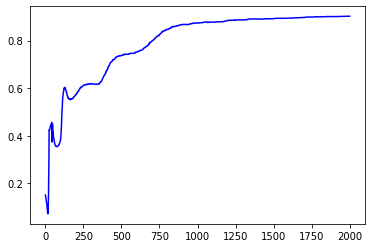

In [41]:
FFN=Feed_Forward()
train(X_train.float(), Y_train, FFN)

#Validation Module

In [48]:
def validation(x, y, model):
  y_val_pred=model(x)
  print("Accuracy is ",accuracy(y_val_pred, y).item()*100,"%")


In [49]:
validation(X_val.float(),Y_val,FFN)

Accuracy is  88.40000033378601 %


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
